# **K-Nearest Neighbors (KNN)**

## Introduction

K-Nearest Neighbors (KNN) is one of the most widely used machine learning algorithms in the industry due to its **simplicity and effectiveness**. 

**Key characteristics:**
- **Non-parametric algorithm**: Makes no assumptions about the underlying data distribution
- **Instance-based learning**: Learns directly from the data
- **Supervised learning**: Can be used for both classification and regression
- **Lazy learning**: No training phase - stores the data and uses it directly for predictions

## How KNN Works

Given a training dataset, for each sample to be predicted, KNN:

1. **Calculates the distance** from the test point to all training points
2. **Finds the K nearest neighbors** (K closest training samples)
3. **For classification**: Assigns the most common label among the K neighbors
4. **For regression**: Assigns the average value of the K neighbors

![KNN Example](./img/knn.png)

In the image above:
- With **K=3**: The green point would be classified as "red triangle" (2 red triangles vs 1 blue square)
- With **K=5**: The green point would be classified as "blue square" (3 blue squares vs 2 red triangles)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_regression

## Simple Classification Example

Let's start with an extremely simple example to understand how KNN classification works.

In [2]:
# Create a very simple dataset: 6 points in 2D
# Features: [x, y] coordinates
X_train = np.array([
    [1, 1],   # Class 0 (Red)
    [1.5, 2], # Class 0 (Red)
    [2, 1],   # Class 0 (Red)
    [6, 6],   # Class 1 (Blue)
    [6.5, 5], # Class 1 (Blue)
    [7, 6]    # Class 1 (Blue)
])

# Labels: 0 = Red, 1 = Blue
y_train = np.array([0, 0, 0, 1, 1, 1])

# New point to classify
X_test = np.array([[5, 4]])

print("Training data:")
print("Class 0 (Red) points:", X_train[y_train == 0])
print("Class 1 (Blue) points:", X_train[y_train == 1])
print("\nTest point to classify:", X_test[0])

Training data:
Class 0 (Red) points: [[1.  1. ]
 [1.5 2. ]
 [2.  1. ]]
Class 1 (Blue) points: [[6.  6. ]
 [6.5 5. ]
 [7.  6. ]]

Test point to classify: [5 4]


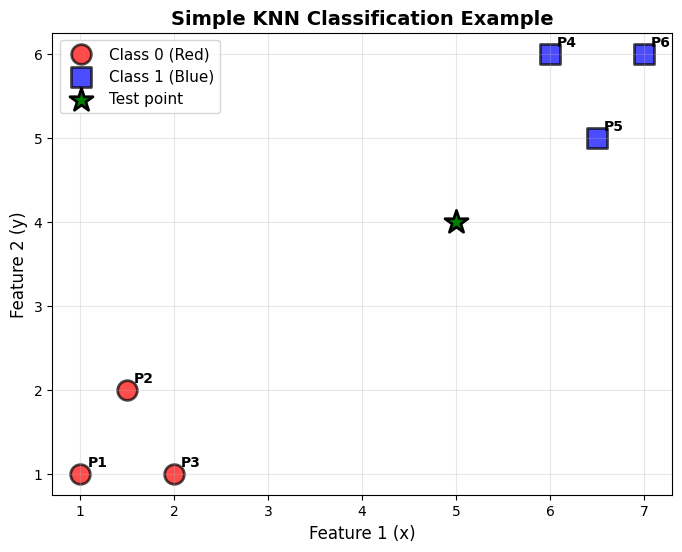

In [3]:
# Visualize the data
plt.figure(figsize=(8, 6))

# Plot training points
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
           c='red', s=200, marker='o', edgecolors='k', linewidth=2, label='Class 0 (Red)', alpha=0.7)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
           c='blue', s=200, marker='s', edgecolors='k', linewidth=2, label='Class 1 (Blue)', alpha=0.7)

# Plot test point
plt.scatter(X_test[:, 0], X_test[:, 1], 
           c='green', s=300, marker='*', edgecolors='k', linewidth=2, label='Test point', zorder=5)

# Add labels to points
for i, (x, y) in enumerate(X_train):
    plt.annotate(f'P{i+1}', (x, y), xytext=(5, 5), textcoords='offset points', fontsize=10, fontweight='bold')

plt.xlabel('Feature 1 (x)', fontsize=12)
plt.ylabel('Feature 2 (y)', fontsize=12)
plt.title('Simple KNN Classification Example', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

### Manually Calculate Distances

Let's manually calculate the distance from the test point to each training point using **Euclidean distance**:

$$d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

In [4]:
# Calculate distances from test point to all training points
test_point = X_test[0]
distances = []

print(f"Test point: {test_point}\n")
print(f"{'Point':<8} {'Coordinates':<15} {'Class':<10} {'Distance Calculation':<40} {'Distance'}")
print("="*95)

for i, (point, label) in enumerate(zip(X_train, y_train)):
    dist = np.sqrt((point[0] - test_point[0])**2 + (point[1] - test_point[1])**2)
    distances.append(dist)
    calc_str = f"√[({point[0]}-{test_point[0]})² + ({point[1]}-{test_point[1]})²]"
    print(f"P{i+1:<7} {str(point):<15} {label:<10} {calc_str:<40} {dist:.3f}")

# Sort by distance
sorted_indices = np.argsort(distances)
print("\n" + "="*95)
print("Points sorted by distance:")
print("="*95)
for rank, idx in enumerate(sorted_indices, 1):
    print(f"{rank}. P{idx+1} (Class {y_train[idx]}) - Distance: {distances[idx]:.3f}")

Test point: [5 4]

Point    Coordinates     Class      Distance Calculation                     Distance
P1       [1. 1.]         0          √[(1.0-5)² + (1.0-4)²]                   5.000
P2       [1.5 2. ]       0          √[(1.5-5)² + (2.0-4)²]                   4.031
P3       [2. 1.]         0          √[(2.0-5)² + (1.0-4)²]                   4.243
P4       [6. 6.]         1          √[(6.0-5)² + (6.0-4)²]                   2.236
P5       [6.5 5. ]       1          √[(6.5-5)² + (5.0-4)²]                   1.803
P6       [7. 6.]         1          √[(7.0-5)² + (6.0-4)²]                   2.828

Points sorted by distance:
1. P5 (Class 1) - Distance: 1.803
2. P4 (Class 1) - Distance: 2.236
3. P6 (Class 1) - Distance: 2.828
4. P2 (Class 0) - Distance: 4.031
5. P3 (Class 0) - Distance: 4.243
6. P1 (Class 0) - Distance: 5.000


### Apply KNN with Different K Values

In [5]:
# Try different K values
k_values = [1, 3, 5]

print("KNN Predictions with different K values:\n")
print("="*80)

for k in k_values:
    # Create and train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict
    prediction = knn.predict(X_test)[0]
    probabilities = knn.predict_proba(X_test)[0]
    
    # Find the K nearest neighbors
    sorted_indices = np.argsort(distances)[:k]
    neighbor_classes = y_train[sorted_indices]
    
    print(f"\nK = {k}:")
    print(f"  Nearest neighbors: ", end="")
    for idx in sorted_indices:
        print(f"P{idx+1}(Class {y_train[idx]}, dist={distances[idx]:.3f})  ", end="")
    print(f"\n  Neighbor classes: {neighbor_classes}")
    print(f"  Vote count: Class 0: {np.sum(neighbor_classes == 0)}, Class 1: {np.sum(neighbor_classes == 1)}")
    print(f"  Predicted class: {prediction} ({'Red' if prediction == 0 else 'Blue'})")
    print(f"  Probabilities: Class 0: {probabilities[0]:.2%}, Class 1: {probabilities[1]:.2%}")

print("\n" + "="*80)

KNN Predictions with different K values:


K = 1:
  Nearest neighbors: P5(Class 1, dist=1.803)  
  Neighbor classes: [1]
  Vote count: Class 0: 0, Class 1: 1
  Predicted class: 1 (Blue)
  Probabilities: Class 0: 0.00%, Class 1: 100.00%

K = 3:
  Nearest neighbors: P5(Class 1, dist=1.803)  P4(Class 1, dist=2.236)  P6(Class 1, dist=2.828)  
  Neighbor classes: [1 1 1]
  Vote count: Class 0: 0, Class 1: 3
  Predicted class: 1 (Blue)
  Probabilities: Class 0: 0.00%, Class 1: 100.00%

K = 5:
  Nearest neighbors: P5(Class 1, dist=1.803)  P4(Class 1, dist=2.236)  P6(Class 1, dist=2.828)  P2(Class 0, dist=4.031)  P3(Class 0, dist=4.243)  
  Neighbor classes: [1 1 1 0 0]
  Vote count: Class 0: 2, Class 1: 3
  Predicted class: 1 (Blue)
  Probabilities: Class 0: 40.00%, Class 1: 60.00%



### Visualize K Nearest Neighbors

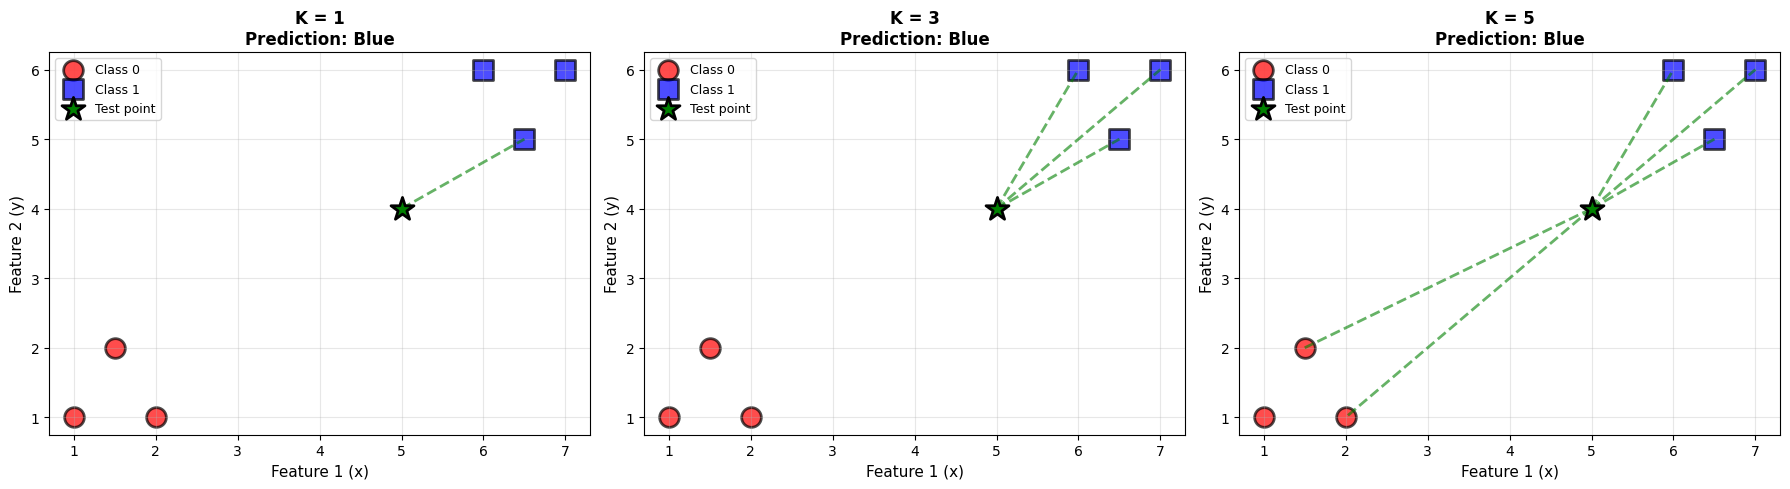

In [6]:
# Visualize with different K values
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, k in enumerate([1, 3, 5]):
    ax = axes[idx]
    
    # Plot training points
    ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
              c='red', s=200, marker='o', edgecolors='k', linewidth=2, label='Class 0', alpha=0.7)
    ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
              c='blue', s=200, marker='s', edgecolors='k', linewidth=2, label='Class 1', alpha=0.7)
    
    # Plot test point
    ax.scatter(X_test[:, 0], X_test[:, 1], 
              c='green', s=300, marker='*', edgecolors='k', linewidth=2, label='Test point', zorder=5)
    
    # Draw circles to K nearest neighbors
    sorted_indices = np.argsort(distances)[:k]
    for neighbor_idx in sorted_indices:
        ax.plot([X_test[0, 0], X_train[neighbor_idx, 0]], 
               [X_test[0, 1], X_train[neighbor_idx, 1]], 
               'g--', linewidth=2, alpha=0.6)
    
    # Make prediction
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)[0]
    pred_color = 'Red' if prediction == 0 else 'Blue'
    
    ax.set_xlabel('Feature 1 (x)', fontsize=11)
    ax.set_ylabel('Feature 2 (y)', fontsize=11)
    ax.set_title(f'K = {k}\nPrediction: {pred_color}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Classification with a Larger Dataset

Let's see how KNN works with a more realistic dataset and visualize the decision boundaries.

In [7]:
# Generate a synthetic dataset
np.random.seed(42)
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                          n_clusters_per_class=1, flip_y=0.1, random_state=42)

# Split into train and test
X_train_large, X_test_large, y_train_large, y_test_large = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train_large)}")
print(f"Test set size: {len(X_test_large)}")
print(f"\nClass distribution in training set:")
print(f"  Class 0: {np.sum(y_train_large == 0)} samples")
print(f"  Class 1: {np.sum(y_train_large == 1)} samples")

Training set size: 80
Test set size: 20

Class distribution in training set:
  Class 0: 45 samples
  Class 1: 35 samples


In [8]:
# Train models with different K values and compare
from sklearn.metrics import accuracy_score

k_values = [1, 3, 5, 10, 20]
accuracies = []

print("Model Performance with Different K Values:\n")
print(f"{'K':<5} {'Training Accuracy':<20} {'Test Accuracy'}")
print("="*50)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_large, y_train_large)
    
    train_acc = accuracy_score(y_train_large, knn.predict(X_train_large))
    test_acc = accuracy_score(y_test_large, knn.predict(X_test_large))
    accuracies.append(test_acc)
    
    print(f"{k:<5} {train_acc:<20.2%} {test_acc:.2%}")

print("="*50)
best_k = k_values[np.argmax(accuracies)]
print(f"\nBest K value: {best_k} (Test accuracy: {max(accuracies):.2%})")

Model Performance with Different K Values:

K     Training Accuracy    Test Accuracy
1     100.00%              70.00%
3     91.25%               80.00%
5     90.00%               80.00%
10    90.00%               80.00%
20    90.00%               80.00%

Best K value: 3 (Test accuracy: 80.00%)


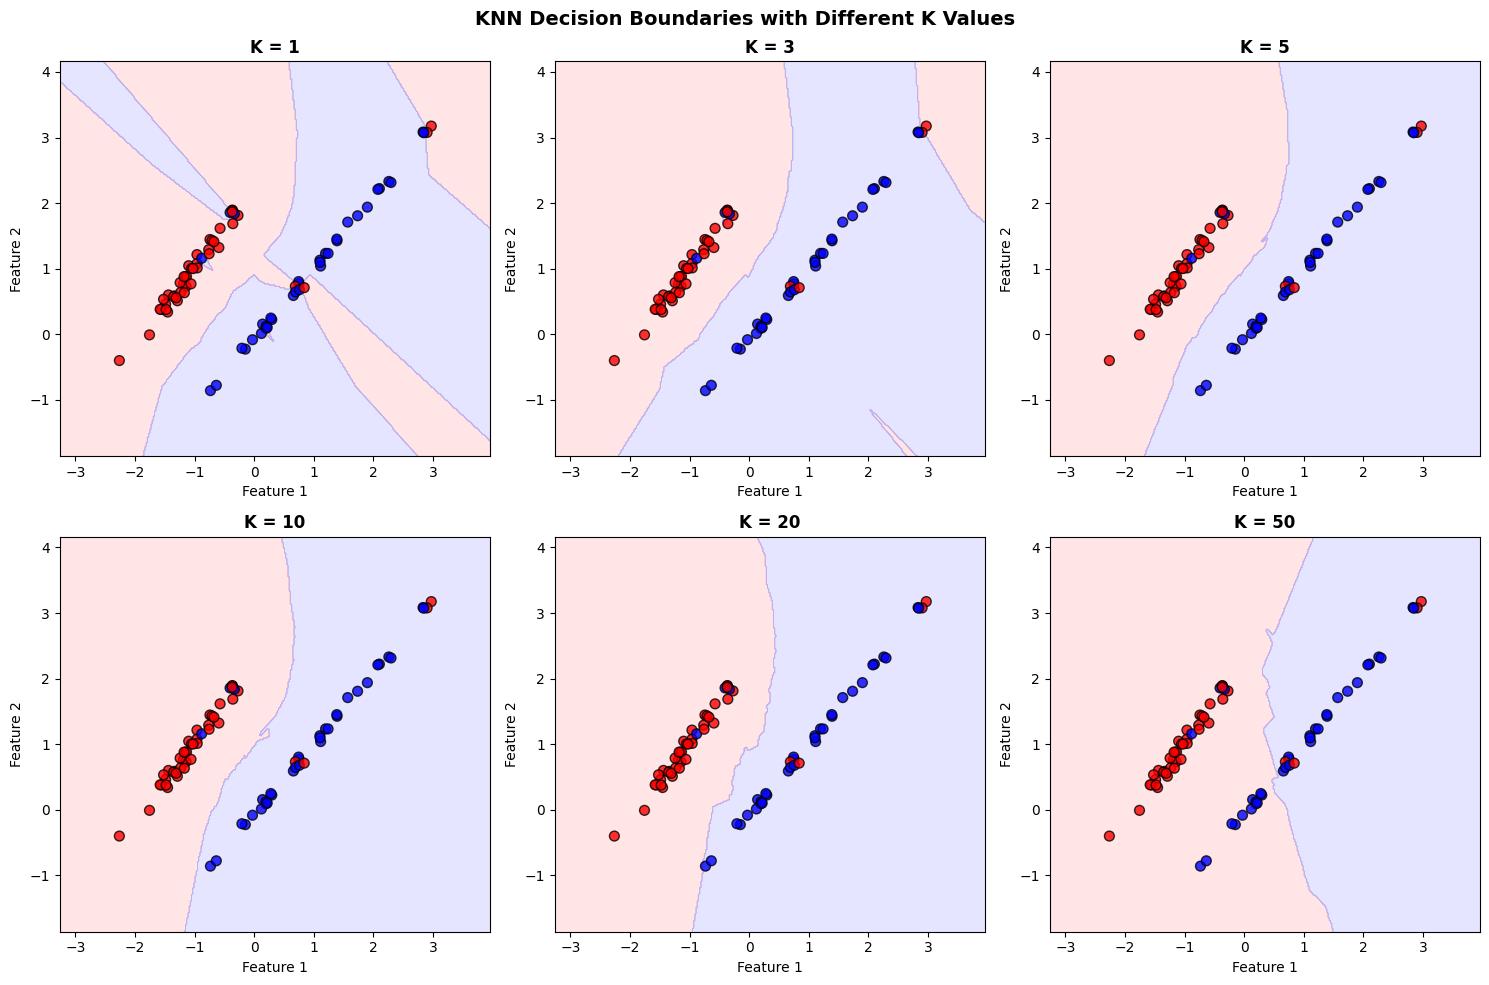


Observations:
• K=1: Very complex boundary, prone to overfitting (fits training data too closely)
• K=5-10: Smoother boundaries, better generalization
• K=50: Too smooth, may underfit (misses important patterns)


In [9]:
# Visualize decision boundaries for different K values
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, k, ax):
    """Plot decision boundary for KNN classifier"""
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    
    # Create mesh
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict on mesh
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50, alpha=0.8)
    ax.set_title(f'K = {k}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Plot decision boundaries
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
k_values_viz = [1, 3, 5, 10, 20, 50]

for idx, k in enumerate(k_values_viz):
    ax = axes[idx // 3, idx % 3]
    plot_decision_boundary(X_train_large, y_train_large, k, ax)

plt.suptitle('KNN Decision Boundaries with Different K Values', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nObservations:")
print("• K=1: Very complex boundary, prone to overfitting (fits training data too closely)")
print("• K=5-10: Smoother boundaries, better generalization")
print("• K=50: Too smooth, may underfit (misses important patterns)")

## Simple Regression Example

In regression, KNN assigns the **average value** of the K nearest neighbors to the test point.

In [10]:
# Create a simple 1D regression example
X_reg_train = np.array([[1], [2], [3], [5], [6], [7]])
y_reg_train = np.array([2, 3, 3.5, 5, 5.5, 6])

# Point to predict
X_reg_test = np.array([[4]])

print("Training data:")
for x, y in zip(X_reg_train.ravel(), y_reg_train):
    print(f"  x = {x}, y = {y}")
print(f"\nPredict y for x = {X_reg_test[0, 0]}")

Training data:
  x = 1, y = 2.0
  x = 2, y = 3.0
  x = 3, y = 3.5
  x = 5, y = 5.0
  x = 6, y = 5.5
  x = 7, y = 6.0

Predict y for x = 4


In [11]:
# Calculate distances and make predictions manually
test_x = X_reg_test[0, 0]
distances_reg = np.abs(X_reg_train.ravel() - test_x)

print(f"\nDistances from x = {test_x}:\n")
print(f"{'Training Point':<20} {'Distance':<15} {'y Value'}")
print("="*50)
for i, (x, dist, y) in enumerate(zip(X_reg_train.ravel(), distances_reg, y_reg_train)):
    print(f"x = {x:<17} {dist:<15.1f} {y}")

# Sort by distance
sorted_indices_reg = np.argsort(distances_reg)

print("\n" + "="*50)
print("Predictions with different K values:\n")

for k in [1, 2, 3]:
    # Get K nearest neighbors
    nearest_indices = sorted_indices_reg[:k]
    nearest_x = X_reg_train[nearest_indices].ravel()
    nearest_y = y_reg_train[nearest_indices]
    
    # Calculate prediction (average of K nearest neighbors)
    prediction_manual = np.mean(nearest_y)
    
    # Using sklearn
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_reg_train, y_reg_train)
    prediction_sklearn = knn_reg.predict(X_reg_test)[0]
    
    print(f"K = {k}:")
    print(f"  Nearest neighbors: x = {list(nearest_x)}, y = {list(nearest_y)}")
    print(f"  Prediction = average({list(nearest_y)}) = {prediction_manual:.2f}")
    print(f"  sklearn prediction: {prediction_sklearn:.2f}")
    print()


Distances from x = 4:

Training Point       Distance        y Value
x = 1                 3.0             2.0
x = 2                 2.0             3.0
x = 3                 1.0             3.5
x = 5                 1.0             5.0
x = 6                 2.0             5.5
x = 7                 3.0             6.0

Predictions with different K values:

K = 1:
  Nearest neighbors: x = [np.int64(5)], y = [np.float64(5.0)]
  Prediction = average([np.float64(5.0)]) = 5.00
  sklearn prediction: 3.50

K = 2:
  Nearest neighbors: x = [np.int64(5), np.int64(3)], y = [np.float64(5.0), np.float64(3.5)]
  Prediction = average([np.float64(5.0), np.float64(3.5)]) = 4.25
  sklearn prediction: 4.25

K = 3:
  Nearest neighbors: x = [np.int64(5), np.int64(3), np.int64(2)], y = [np.float64(5.0), np.float64(3.5), np.float64(3.0)]
  Prediction = average([np.float64(5.0), np.float64(3.5), np.float64(3.0)]) = 3.83
  sklearn prediction: 3.83



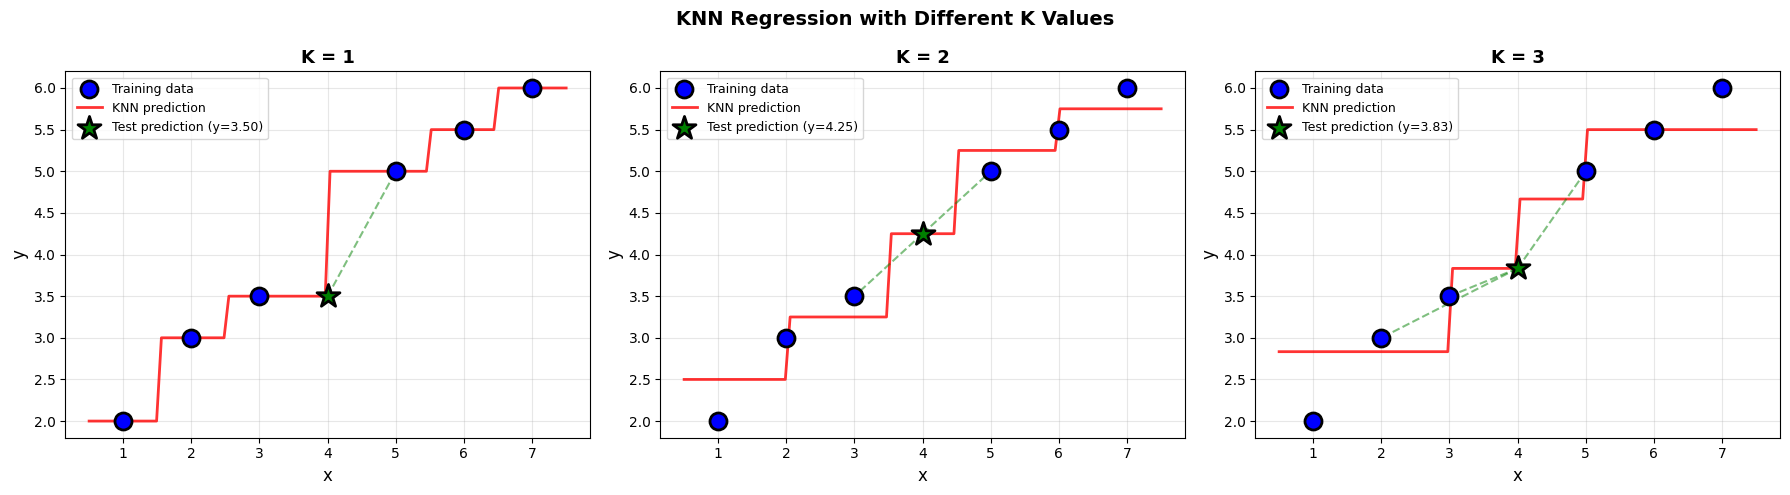

In [12]:
# Visualize regression with different K values
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Create a range for smooth predictions
X_range = np.linspace(0.5, 7.5, 100).reshape(-1, 1)

for idx, k in enumerate([1, 2, 3]):
    ax = axes[idx]
    
    # Train model
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_reg_train, y_reg_train)
    
    # Predict on range
    y_pred_range = knn_reg.predict(X_range)
    
    # Plot training data
    ax.scatter(X_reg_train, y_reg_train, c='blue', s=150, edgecolors='k', 
              linewidth=2, label='Training data', zorder=3)
    
    # Plot prediction line
    ax.plot(X_range, y_pred_range, 'r-', linewidth=2, label='KNN prediction', alpha=0.8)
    
    # Highlight test point
    test_pred = knn_reg.predict(X_reg_test)[0]
    ax.scatter(X_reg_test, test_pred, c='green', s=300, marker='*', 
              edgecolors='k', linewidth=2, label=f'Test prediction (y={test_pred:.2f})', zorder=4)
    
    # Draw lines to nearest neighbors
    sorted_indices_reg = np.argsort(distances_reg)[:k]
    for neighbor_idx in sorted_indices_reg:
        ax.plot([X_reg_test[0, 0], X_reg_train[neighbor_idx, 0]], 
               [test_pred, y_reg_train[neighbor_idx]], 
               'g--', linewidth=1.5, alpha=0.5)
    
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_title(f'K = {k}', fontsize=13, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle('KNN Regression with Different K Values', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Regression with a Real Dataset

Let's apply KNN regression to a more realistic scenario.

In [13]:
# Generate synthetic regression data
np.random.seed(42)
X_reg_large = np.sort(5 * np.random.rand(80, 1), axis=0)
y_reg_large = np.sin(X_reg_large).ravel() + np.random.normal(0, 0.1, X_reg_large.shape[0])

# Split data
X_reg_train_large = X_reg_large[:60]
y_reg_train_large = y_reg_large[:60]
X_reg_test_large = X_reg_large[60:]
y_reg_test_large = y_reg_large[60:]

print(f"Training set size: {len(X_reg_train_large)}")
print(f"Test set size: {len(X_reg_test_large)}")

Training set size: 60
Test set size: 20


In [14]:
# Compare different K values
from sklearn.metrics import mean_squared_error, r2_score

k_values_reg = [1, 3, 5, 10, 20]

print("Regression Performance with Different K Values:\n")
print(f"{'K':<5} {'Train MSE':<15} {'Test MSE':<15} {'Test R²'}")
print("="*55)

for k in k_values_reg:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_reg_train_large, y_reg_train_large)
    
    train_pred = knn_reg.predict(X_reg_train_large)
    test_pred = knn_reg.predict(X_reg_test_large)
    
    train_mse = mean_squared_error(y_reg_train_large, train_pred)
    test_mse = mean_squared_error(y_reg_test_large, test_pred)
    test_r2 = r2_score(y_reg_test_large, test_pred)
    
    print(f"{k:<5} {train_mse:<15.4f} {test_mse:<15.4f} {test_r2:.4f}")

print("="*55)

Regression Performance with Different K Values:

K     Train MSE       Test MSE        Test R²
1     0.0000          0.1071          -1.9380
3     0.0054          0.1907          -4.2296
5     0.0090          0.2870          -6.8726
10    0.0164          0.5296          -13.5263
20    0.0472          1.0963          -29.0697


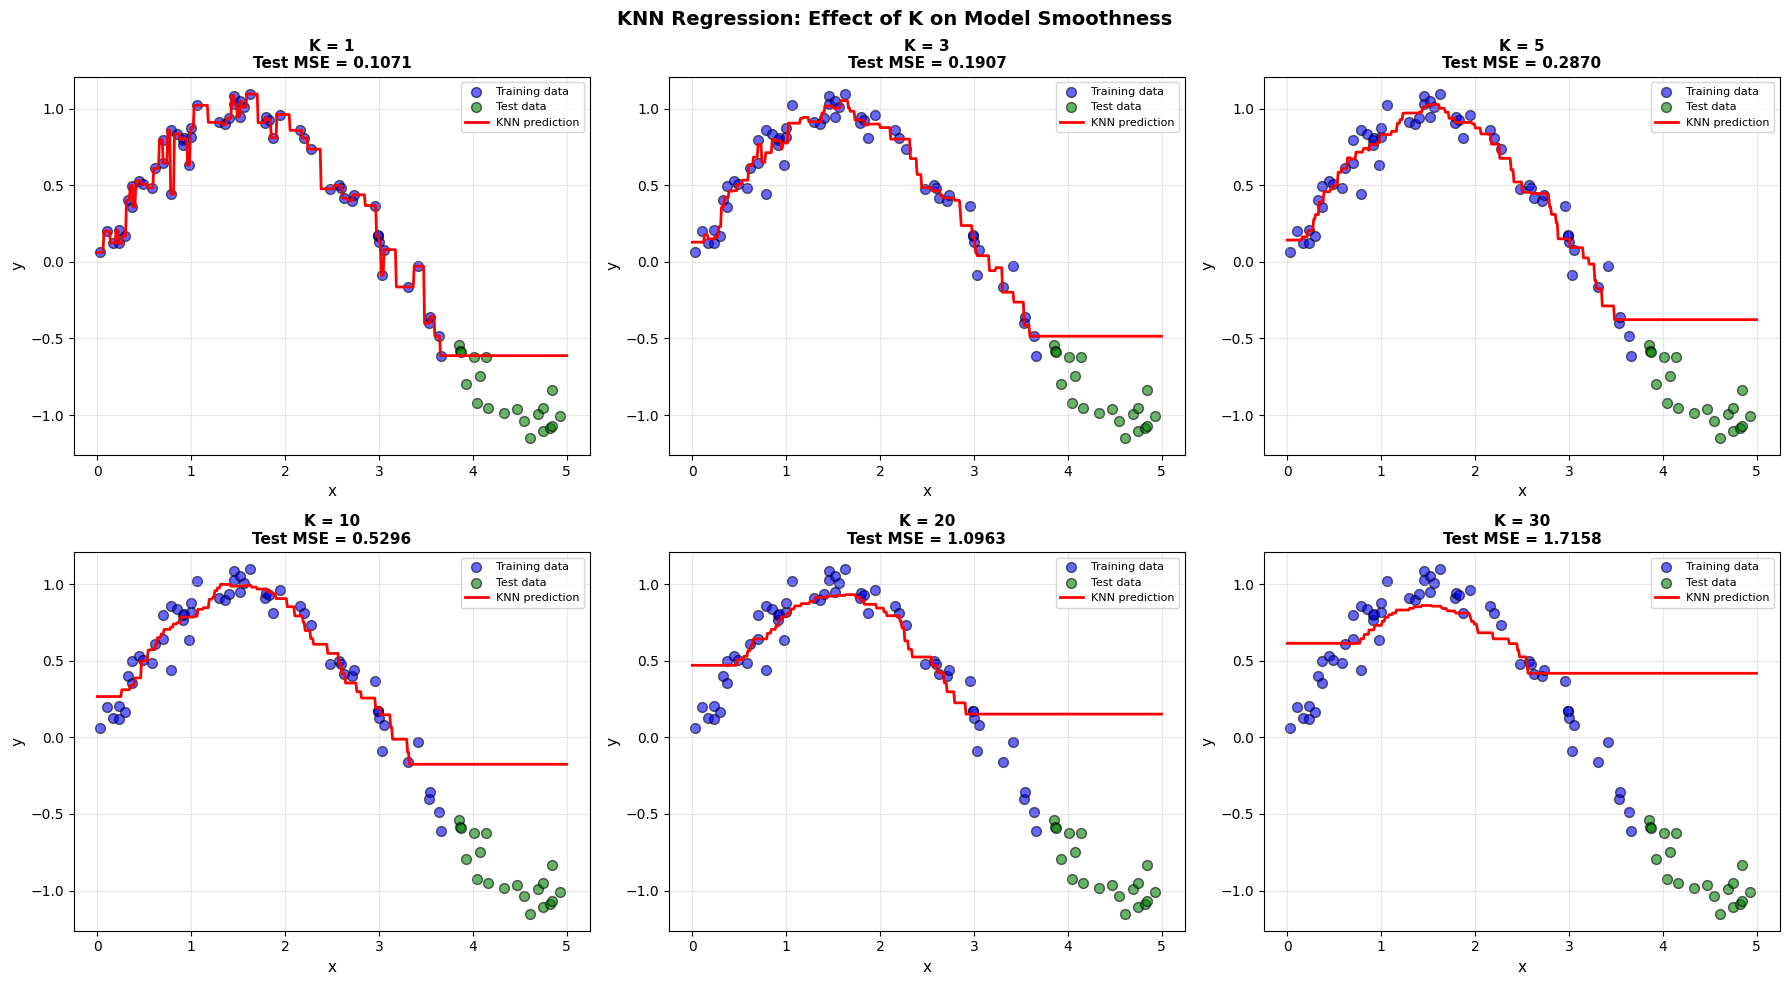


Observations:
• K=1: Very wiggly, follows training data too closely (overfitting)
• K=5-10: Smooth curve that captures the pattern well
• K=30: Too smooth, misses the sinusoidal pattern (underfitting)


In [15]:
# Visualize regression fits
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
k_values_viz_reg = [1, 3, 5, 10, 20, 30]

X_plot = np.linspace(0, 5, 500).reshape(-1, 1)

for idx, k in enumerate(k_values_viz_reg):
    ax = axes[idx // 3, idx % 3]
    
    # Train model
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_reg_train_large, y_reg_train_large)
    
    # Predict
    y_plot = knn_reg.predict(X_plot)
    test_pred = knn_reg.predict(X_reg_test_large)
    test_mse = mean_squared_error(y_reg_test_large, test_pred)
    
    # Plot
    ax.scatter(X_reg_train_large, y_reg_train_large, c='blue', s=50, 
              edgecolors='k', alpha=0.6, label='Training data')
    ax.scatter(X_reg_test_large, y_reg_test_large, c='green', s=50, 
              edgecolors='k', alpha=0.6, label='Test data')
    ax.plot(X_plot, y_plot, 'r-', linewidth=2, label='KNN prediction')
    
    ax.set_xlabel('x', fontsize=11)
    ax.set_ylabel('y', fontsize=11)
    ax.set_title(f'K = {k}\nTest MSE = {test_mse:.4f}', fontsize=11, fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.suptitle('KNN Regression: Effect of K on Model Smoothness', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nObservations:")
print("• K=1: Very wiggly, follows training data too closely (overfitting)")
print("• K=5-10: Smooth curve that captures the pattern well")
print("• K=30: Too smooth, misses the sinusoidal pattern (underfitting)")

## Distance Metrics

KNN uses distance to find neighbors. The most common distance metrics are:

1. **Euclidean distance** (default): $d = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$
2. **Manhattan distance**: $d = \sum_{i=1}^{n}|x_i - y_i|$
3. **Minkowski distance**: $d = (\sum_{i=1}^{n}|x_i - y_i|^p)^{1/p}$ (generalizes Euclidean and Manhattan)

In [16]:
# Compare different distance metrics
from sklearn.metrics import accuracy_score

metrics = ['euclidean', 'manhattan', 'minkowski']
k = 5

print(f"Comparing Distance Metrics (K = {k}):\n")
print(f"{'Metric':<15} {'Train Accuracy':<20} {'Test Accuracy'}")
print("="*55)

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn.fit(X_train_large, y_train_large)
    
    train_acc = accuracy_score(y_train_large, knn.predict(X_train_large))
    test_acc = accuracy_score(y_test_large, knn.predict(X_test_large))
    
    print(f"{metric:<15} {train_acc:<20.2%} {test_acc:.2%}")

print("="*55)
print("\nNote: Different metrics may perform better on different datasets.")
print("Euclidean is most common for continuous features.")

Comparing Distance Metrics (K = 5):

Metric          Train Accuracy       Test Accuracy
euclidean       90.00%               80.00%
manhattan       90.00%               80.00%
minkowski       90.00%               80.00%

Note: Different metrics may perform better on different datasets.
Euclidean is most common for continuous features.


## Key Characteristics of KNN

### Advantages:
- ✅ **Simple to understand and implement**
- ✅ **No training phase** (stores data directly)
- ✅ **Works well with small datasets**
- ✅ **No assumptions about data distribution** (non-parametric)
- ✅ **Can be used for both classification and regression**

### Disadvantages:
- ❌ **Slow prediction** (must calculate distance to all training points)
- ❌ **Memory intensive** (stores entire dataset)
- ❌ **Not suitable for large datasets** (curse of dimensionality)
- ❌ **Sensitive to feature scaling** (features with large ranges dominate distance calculation)
- ❌ **Sensitive to irrelevant features**
- ❌ **Choice of K is critical**

### Computational Complexity:
- **Training:** O(1) - just stores the data
- **Prediction:** O(n × d) - where n = number of training samples, d = number of features

This is opposite to most ML algorithms where training is expensive but prediction is fast!

![KNN Decision Surface Animation](https://upload.wikimedia.org/wikipedia/commons/7/78/KNN_decision_surface_animation.gif)

## Choosing the Right K Value

**Guidelines for selecting K:**

1. **K = 1**: Very flexible, high variance, prone to overfitting
2. **K = √n** (where n is the number of training samples): Common rule of thumb
3. **K = large**: Very smooth, high bias, prone to underfitting
4. **Use cross-validation** to find the optimal K for your dataset
5. **Odd K for binary classification** to avoid ties

**Trade-off:**
- Small K → more complex model → overfitting
- Large K → simpler model → underfitting

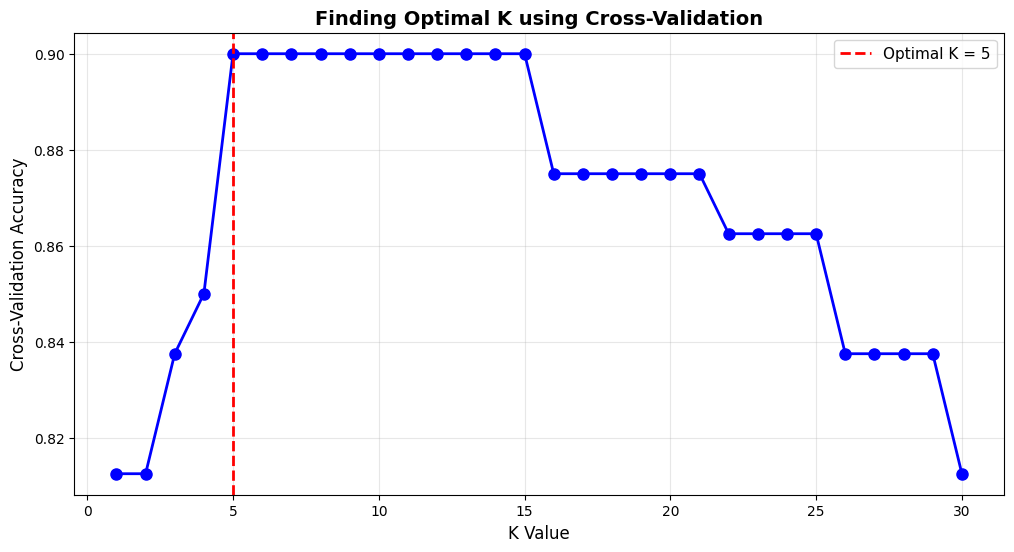

Optimal K value: 5
Cross-validation accuracy: 90.00%


In [17]:
# Find optimal K using cross-validation
from sklearn.model_selection import cross_val_score

k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_large, y_train_large, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(k_range, k_scores, 'b-o', linewidth=2, markersize=8)
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Cross-Validation Accuracy', fontsize=12)
plt.title('Finding Optimal K using Cross-Validation', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Mark the best K
best_k_cv = k_range[np.argmax(k_scores)]
plt.axvline(x=best_k_cv, color='r', linestyle='--', linewidth=2, label=f'Optimal K = {best_k_cv}')
plt.legend(fontsize=11)
plt.show()

print(f"Optimal K value: {best_k_cv}")
print(f"Cross-validation accuracy: {max(k_scores):.2%}")

## Summary

KNN is a **simple yet powerful algorithm** that:
- Makes predictions based on the K nearest training examples
- Uses **majority vote** for classification
- Uses **average** for regression
- Has no training phase (lazy learning)
- Is sensitive to the choice of K and distance metric
- Works best with small to medium-sized datasets
- Requires feature scaling for best results

**When to use KNN:**
- Small to medium datasets
- When you need a simple baseline model
- When the decision boundary is very irregular
- When you have low-dimensional data (few features)

**When NOT to use KNN:**
- Large datasets (slow prediction)
- High-dimensional data (curse of dimensionality)
- Real-time prediction requirements
- When memory is limited